**Relevant reading for this problem set**:
<a href="https://moderndive.com/10-inference-for-regression.html"
target="_blank">ModernDive Chapter 10: Inference for Regression</a>.

## Background

For this problem set you will apply statistical inference to a linear
modeling and explore methods to check the required conditions. To start
we will build a model using data from the `palmerpenguins` package. The
`penguins` data contains size measurements for three penguin species
observed on three islands in the Palmer Archipelago, Antarctica.

First we will start with our typical exploratory data analysis and then
build our linear model. From there we will use our new skills to make
inferences about our regression model and check the necessary
conditions.

### Load packages

We will read the data in from the`palmerpenguins` package, explore the
data using the `dplyr` package and visualize it using the `ggplot2`
package. The `moderndive` package includes some nice functions to show
regression model outputs and finally use the `infer` package for “tidy”
and transparent statistical inference.

In [1]:
library('moderndive')
library('infer')
library('palmerpenguins')
library('tidymodels')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ rsample      1.3.1
✔ dials        1.4.1     ✔ tibble       3.3.0
✔ dplyr        1.1.4     ✔ tidyr        1.3.1
✔ ggplot2      3.5.2     ✔ tune         1.3.0
✔ modeldata    1.5.0     ✔ workflows    1.2.0
✔ parsnip      1.3.2     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2
✔ recipes      1.3.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



### The data

In [5]:
pen = penguins |> 
  filter(!is.na(flipper_length_mm))
glimpse(pen)
head(pen)

Rows: 342
Columns: 7
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 34.1, 42.0…
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 18.1, 20.2…
$ flipper_length_mm <int> 181, 186, 195, 193, 190, 181, 195, 193, 190, 186, 18…
$ body_mass_g       <int> 3750, 3800, 3250, 3450, 3650, 3625, 4675, 3475, 4250…
$ sex               <fct> male, female, female, female, male, female, male, NA…


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
Adelie,Torgersen,39.1,18.7,181,3750,male
Adelie,Torgersen,39.5,17.4,186,3800,female
Adelie,Torgersen,40.3,18.0,195,3250,female
Adelie,Torgersen,36.7,19.3,193,3450,female
Adelie,Torgersen,39.3,20.6,190,3650,male
Adelie,Torgersen,38.9,17.8,181,3625,female


Take a moment to look at the data using `glimpse` and `head`. The dataset contains 8
variables. You can read more about the variables by placing your cursor in `penguins` and 
looking at the `Contextual Help` tool.

For our lab we will focus on four variables, the explanatory variables
include:

-   `flipper_length_mm` - an integer denoting flipper length
    (millimeters)
-   `bill_length_mm` - a number denoting bill length (millimeters)
-   `species`- denotes penguin species (Adélie, Chinstrap and Gentoo)

The outcome variable `body_mass_g` is an integer denoting body mass
(grams).

### Visualization

We will start by investigating the relationship between
‘flipper_length_mm’ and ‘body_mass_g’.

`geom_smooth()` using formula = 'y ~ x'


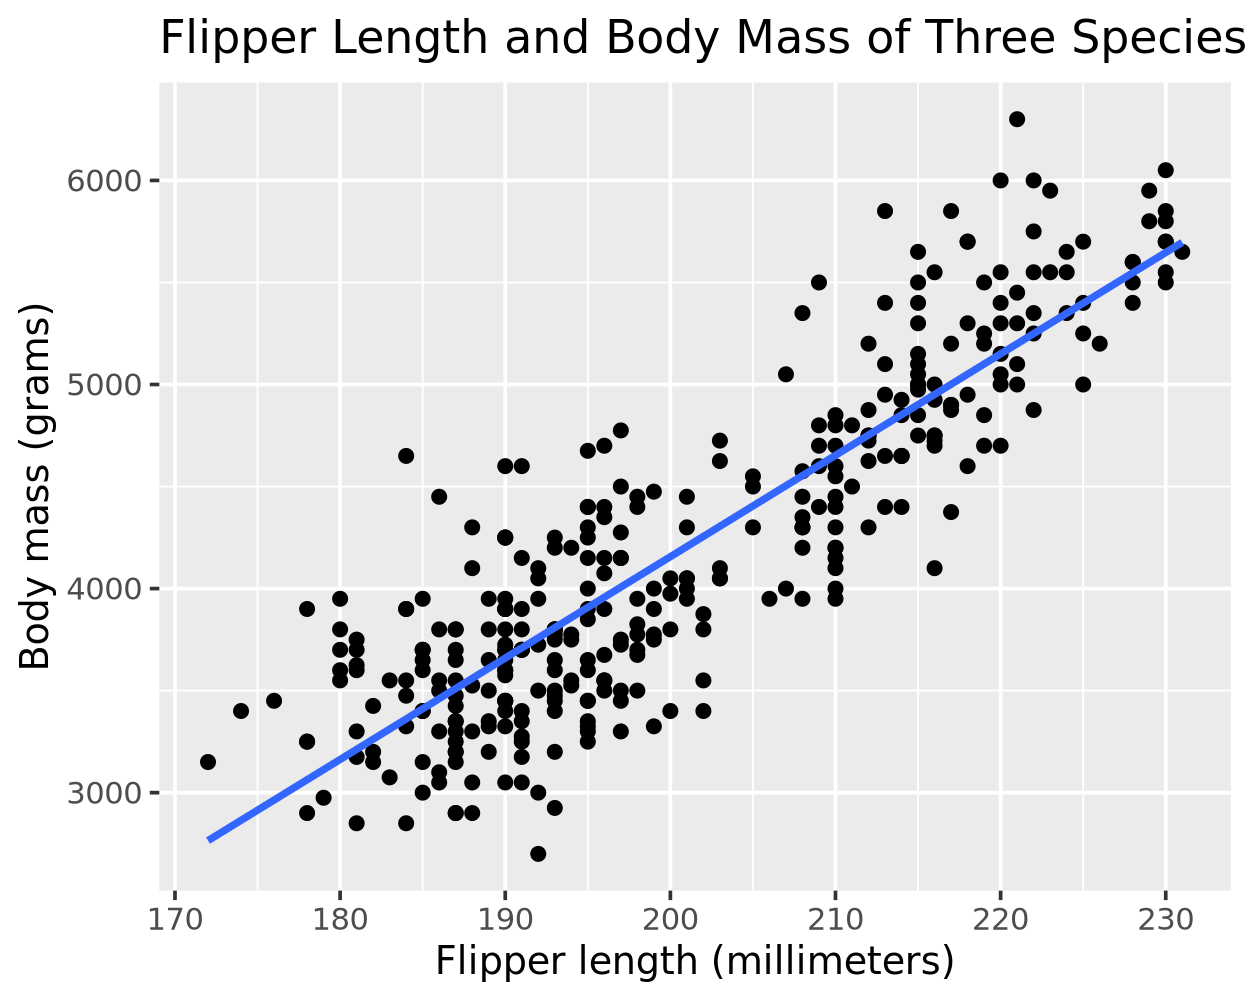

In [6]:
ggplot(data = pen, aes(y = body_mass_g, x = flipper_length_mm)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "Flipper length (millimeters)", y = "Body mass (grams)", title = "Flipper Length and Body Mass of Three Species of Penguins") 

## Question 1

Does the relationship appear to be positive or negative? Does it look to
be reasonably linear?

**Answer:**

## Create a linear regression model

Here we use the [standard error](https://moderndive.com/10-inference-for-regression.html#regression-se) to calculate a confidence interval. Later we will use the bootstrap resampling technique
that does not rely on distrubutional assumptions.

In [7]:
mod = linear_reg() |> set_engine('lm')

pen_model = mod |> fit(body_mass_g ~ flipper_length_mm, data = pen)

tidy(pen_model) |> mutate(lower_ci = estimate - 1.96 * std.error, upper_ci = estimate + 1.96 * std.error)

term,estimate,std.error,statistic,p.value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-5780.83136,305.814504,-18.90306,5.587301e-55,-6380.22779,-5181.43493
flipper_length_mm,49.68557,1.518404,32.72223,4.370681e-107,46.70949,52.66164


## Question 2

Using our shorthand interpretation for confidence intervals and the
regression table, write a sentence interpreting the 95% confidence
interval for $\beta_1$?

**Answer:**

We are 95% confident that for each additional millimeter increase in flipper length, the average penguin body mass increases by between approximately 46.7 and 52.7 grams.



## Question 3

Recall that the test statistic and $p$-value correspond to the
hypothesis test:

$$\begin{aligned} H_0:&\beta_{1} = 0 \\\ \mbox{vs }H_A:& \beta_{1} \neq 0 \end{aligned}$$

Write up the results & conclusions for this hypothesis test.

**Answer:**

Because the p-value (< 0.001) is far smaller than 0.05, we reject the null hypothesis. There is strong statistical evidence that flipper length is positively associated with body mass in penguins — as flipper length increases, body mass tends to increase significantly.



## Question 4

You may remember that this hypothesis test is only valid if certain
“conditions for inference for regression” are met. Let’s take a closer
look those conditions.

1.  Linearity of relationship between variables
2.  Independence of the residuals
3.  Normality of the residuals
4.  Equality of variance of the residuals

## Linearity of relationship between variables

**4a) ** This was analyzed in question 1. Did you say that the
relationship between `flipper_length_mm` and `body_mass_g` appears to be
linear?

**Answer:**

Yes, the relationship between flipper_length_mm and body_mass_g appears to be linear. The scatterplot shows that as flipper length increases, body mass also increases in a roughly straight-line pattern, with no major curvature or non-linear trends visible.



## Independence of the residuals

The observations in our data must be independent of one another. In this
data, we can not be sure this is case, for example, some of the penguins
included may be related (siblings, parents). We are not given enough
information to verify this condition has been met.

## Normality of the residuals

The third condition is that the residuals should follow a Normal
distribution centered 0. To check for normality, create a histogram.

The code to get the residuals is given.

In [8]:
regression_points = augment(pen_model, new_data = pen)

regression_points |> head()

.pred,.resid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
3212.256,537.743839,Adelie,Torgersen,39.1,18.7,181,3750,male
3460.684,339.316007,Adelie,Torgersen,39.5,17.4,186,3800,female
3907.854,-657.854091,Adelie,Torgersen,40.3,18.0,195,3250,female
3808.483,-358.482958,Adelie,Torgersen,36.7,19.3,193,3450,female
3659.426,-9.426259,Adelie,Torgersen,39.3,20.6,190,3650,male
3212.256,412.743839,Adelie,Torgersen,38.9,17.8,181,3625,female


**4b)**

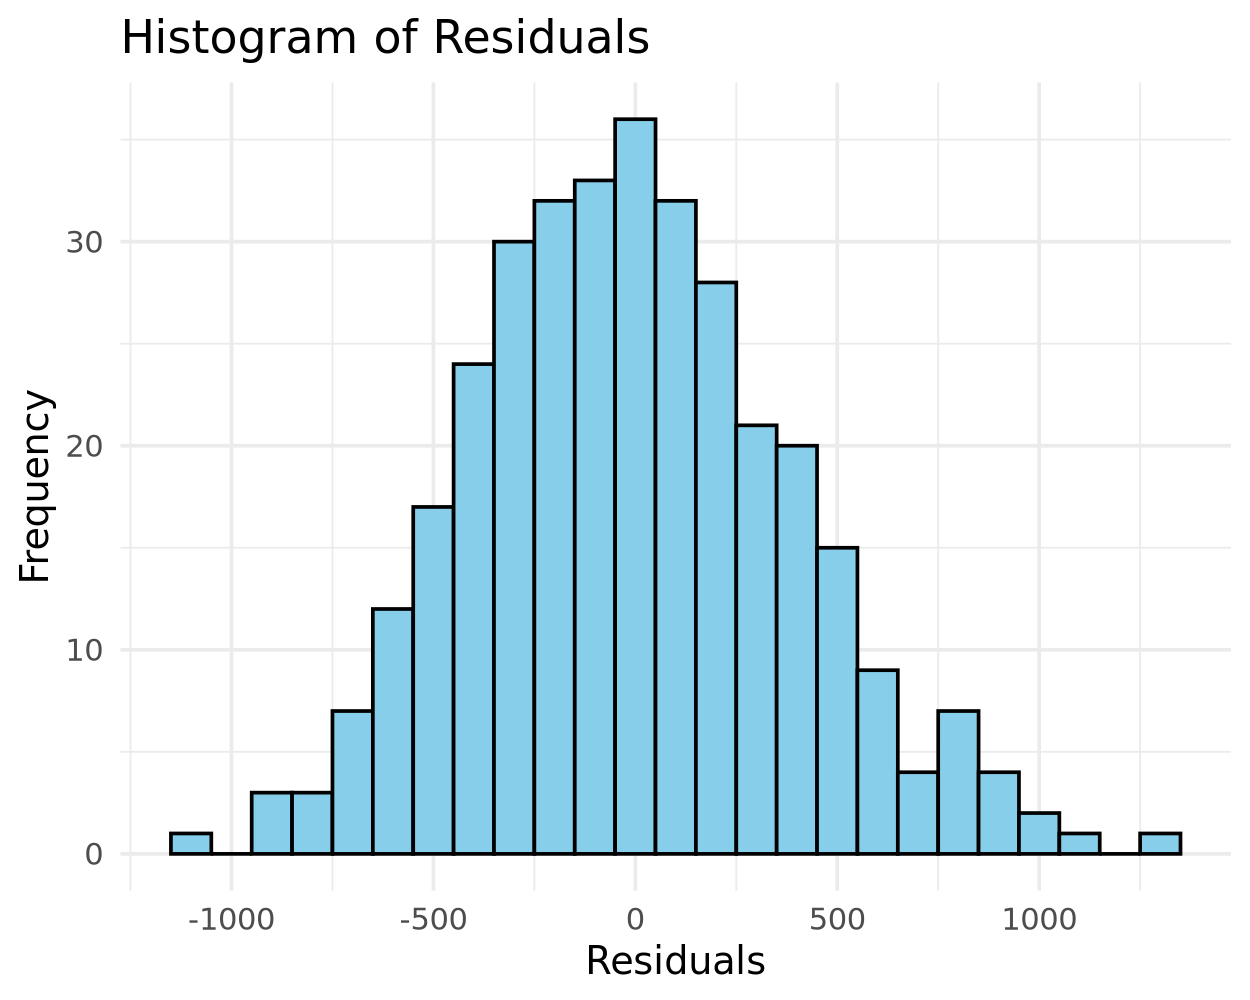

In [9]:
ggplot(regression_points, aes(x = .resid)) +
  geom_histogram(binwidth = 100, fill = "skyblue", color = "black") +
  labs(title = "Histogram of Residuals", x = "Residuals", y = "Frequency") +
  theme_minimal()




**4c)** Does this model meet the normality of residuals condition?

**Answer:**

Yes, the model appears to meet the normality of residuals condition. The histogram shows a roughly symmetric, bell-shaped distribution centered near zero, with only minor deviations at the tails. This suggests that the residuals are approximately normally distributed.



## Equality of variance of the residuals

The final condition says that the residual should exhibit equal variace
across all of the values of the explanatory variable.

To check this condition we can create a scatterplot that has our
explanatory variable, `flipper_length_mm`, on the x-axis and our
residuals on the y-axis. Does this model meet the Normality of Residuals
condition?

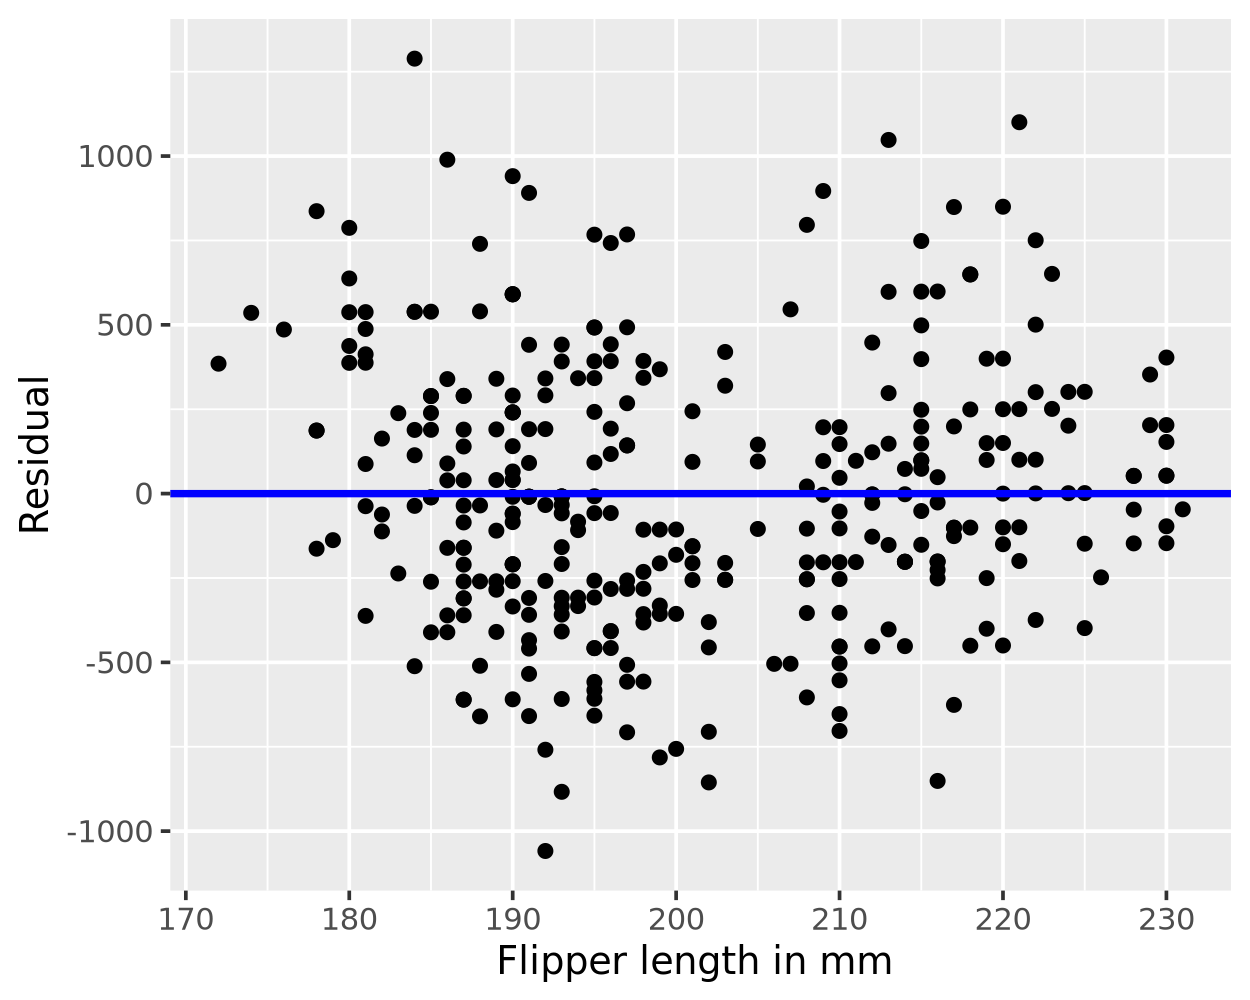

In [10]:
ggplot(regression_points, aes(x = flipper_length_mm, y = .resid)) +
  geom_point() +
  labs(x = "Flipper length in mm ", y = "Residual") +
  geom_hline(yintercept = 0, col = "blue", linewidth = 1)

**4d.** Does this model meet the equality of variance condition?

**Answer:**

Yes, the model appears to meet the equality of variance condition. The residuals are randomly scattered above and below zero across all flipper lengths, showing no clear pattern or funnel shape. This suggests that the variability of residuals remains roughly constant, indicating homoscedasticity.


## Question 5

Now let’s circle back and take a second look at the confidence
intervals. Using this bootstrap distribution, we’ll construct the 95%
confidence interval using the percentile method and (if appropriate) the
standard error method as well. We can compare our results to the results
from R (which uses mathematical formula to construct confidence
intervals.)

### Step 1: Calculate the bootstrap statistic and Visualize the bootstrap distribution

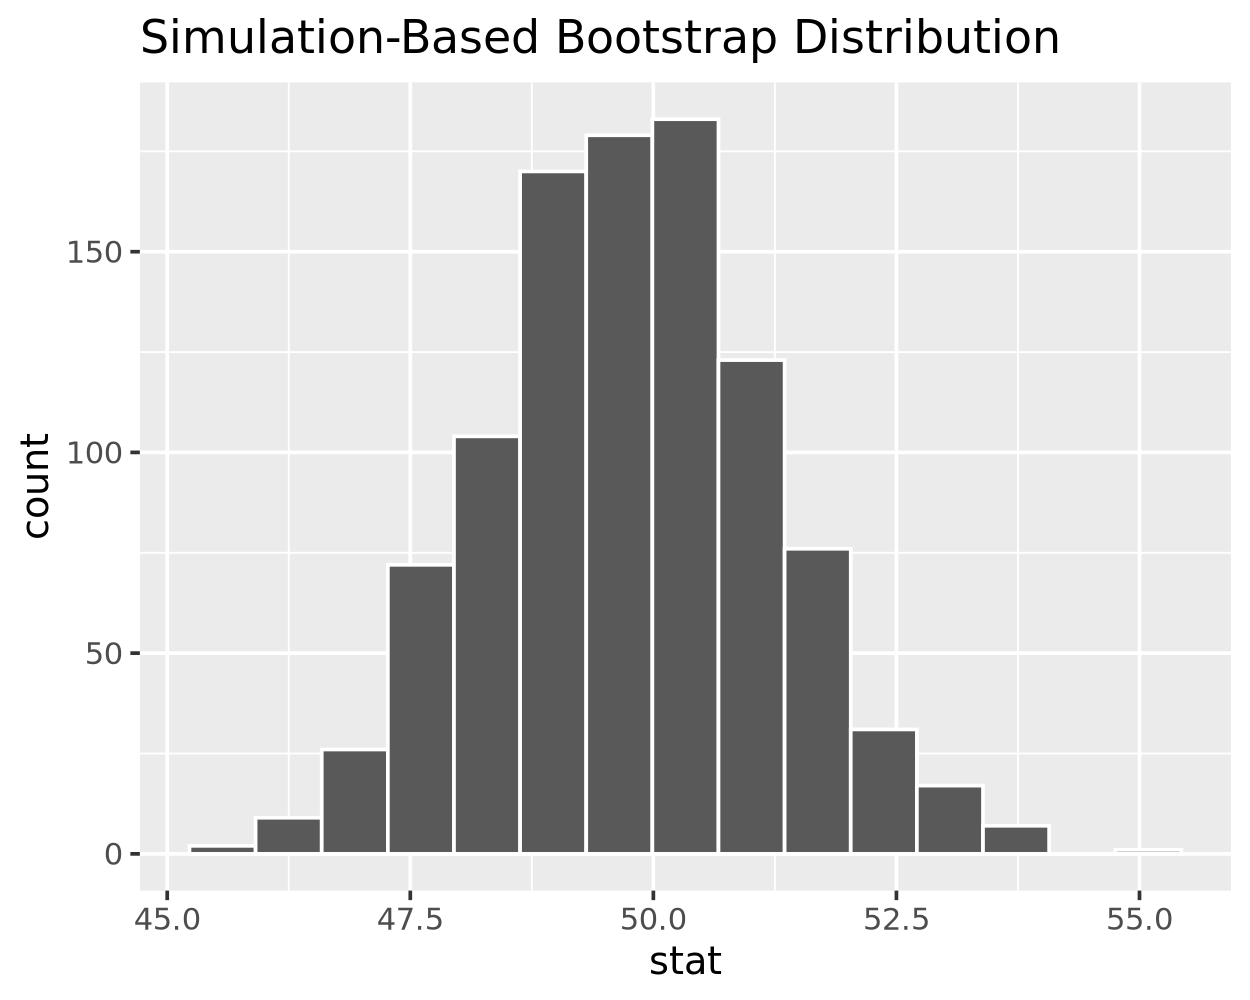

In [11]:
bootstrap_distn_slope = pen |> 
  specify(formula = body_mass_g ~ flipper_length_mm) |>
  generate(reps = 1000, type = "bootstrap") |>
  calculate(stat = "slope")

visualize(bootstrap_distn_slope)

### Step 2: Calculate CI from the a bootstap resample using the percentile method.

Find a 95% CI using percentile method:

In [12]:
bootstrap_distn_slope |>
  summarize(lower_ci = quantile(stat, 0.025), upper_ci = quantile(stat, 0.975))

lower_ci,upper_ci
<dbl>,<dbl>
47.03838,52.65225


## Question 6

Write down the two 95% confidence intervals for the $\beta_{1}$. a, b,
c, and d with the appropriate values you’ve computed.

When you are done, make sure all the `|` in the table still line up so
your results print out in a table!

| CI construction method                | lower value | upper value |
|---------------------------------------|-------------|-------------|
| Using bootstrap: percentile rule      | 46.03838      | 52.652      |
| Using mathematical formula (see [above](#Create-a-linear-regression-model)) | 46.70949 |	52.66164 |

In your opinion, would you say these three confidence intervals are
similar?

**Answers:**

Yes, the two confidence intervals are very similar. The bootstrap percentile CI (46.04, 52.65) and the mathematical CI (46.71, 52.66) overlap almost entirely, indicating that the linear model’s normality assumptions are reasonable. This similarity suggests the model is well-behaved and that both methods provide consistent estimates of the true slope.



## Part 2

For the next part you will check the conditions for regression inference
for a new model. This model will have `bill_length_mm` and `species` as
explanatory variables, and we’ll use the parallel slopes model

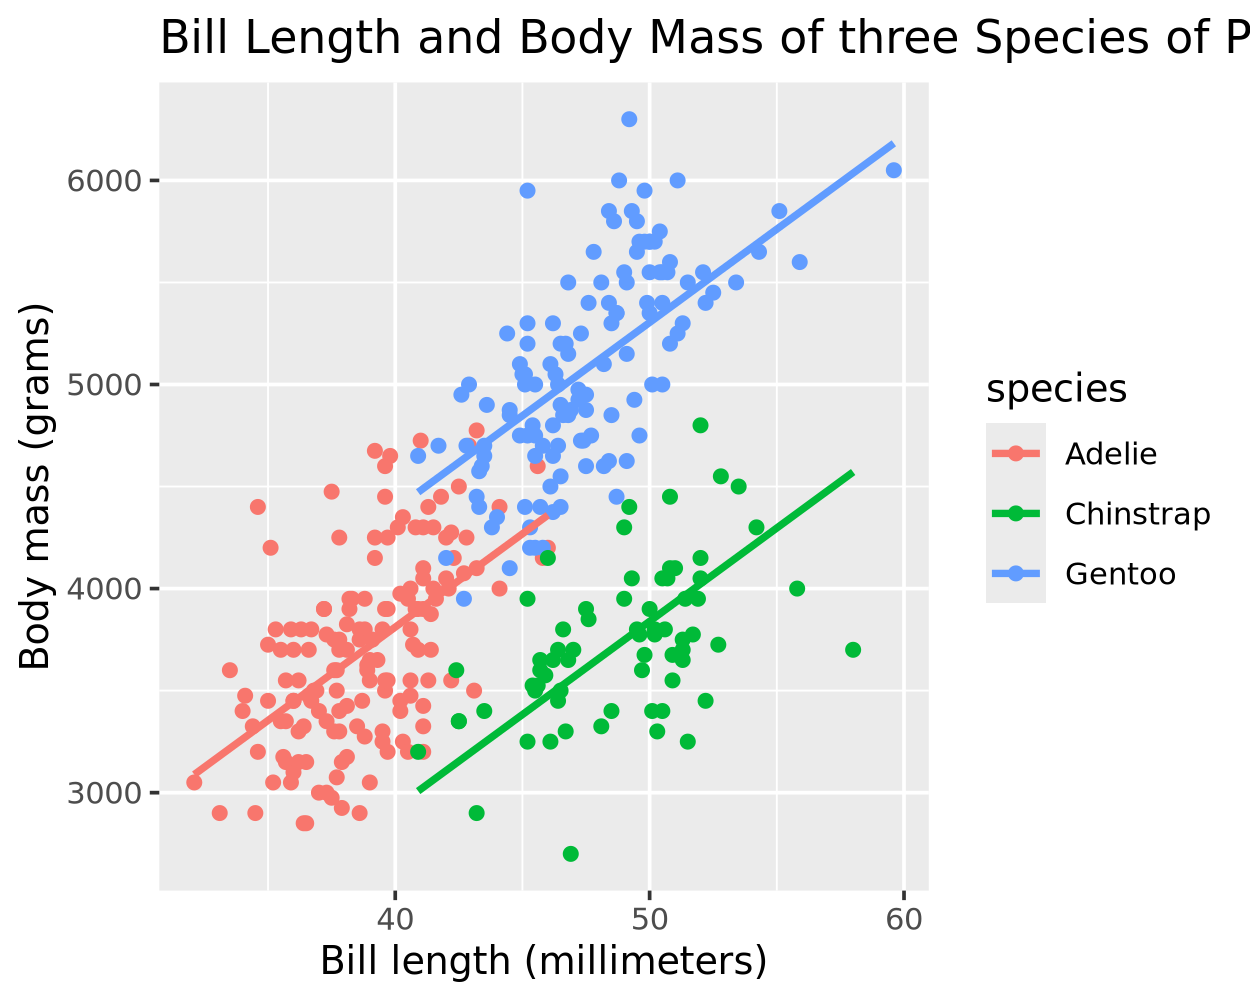

In [13]:
ggplot(data = pen, aes(y = body_mass_g, x = bill_length_mm, color=species)) + 
  geom_point() + 
  geom_parallel_slopes(se = FALSE) +
  labs(x = "Bill length (millimeters)", y = "Body mass (grams)", title = "Bill Length and Body Mass of three Species of Penguins") 

Let’s fit the parallel slopes model

In [14]:
# Fit regression model:

mod = linear_reg() |> set_engine('lm')

pen_parallel = mod |> fit(body_mass_g ~ bill_length_mm + species, data = pen)

# Get regression table:
tidy(pen_parallel)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),153.73969,268.901233,0.5717329,5.678829e-01
bill_length_mm,91.43582,6.887119,13.2763517,1.158990e-32
speciesChinstrap,-885.81208,88.250154,-10.0375131,6.373927e-21
speciesGentoo,578.62916,75.362341,7.6779617,1.756354e-13


Let us once again inspect the conditions necessary for inference with
regression.

1.  Linearity of relationship between variables
2.  Independence of the residuals
3.  Normality of the residuals
4.  Equality of variance of the residuals

## Question 7

**Check for Linearity of relationship between variables **

Would you say that the relationship between `bill_length_mm` and
`body_mass_g` appears to be linear for each species?

**Answer:**

Yes, the relationship between bill_length_mm and body_mass_g appears to be reasonably linear for each species. The regression output shows a strong, statistically significant positive slope for bill length (estimate = 91.44, p < 0.001), indicating that as bill length increases, body mass tends to increase. There is no evidence of curvature or interaction effects in the model, suggesting that the linearity assumption holds within each species group.

**Check for Independence of the residuals **

This is the same as the first model that we looked it. The observations
in our data must be independent of one another. In this data, we can not
be sure this is case, for example, some of the penguins included may be
related (siblings, parents). We are not given enough information to
verify this condition has been met.

## Question 8

Check Normality of the residuals (and they should be centered at 0.)

**8a) **

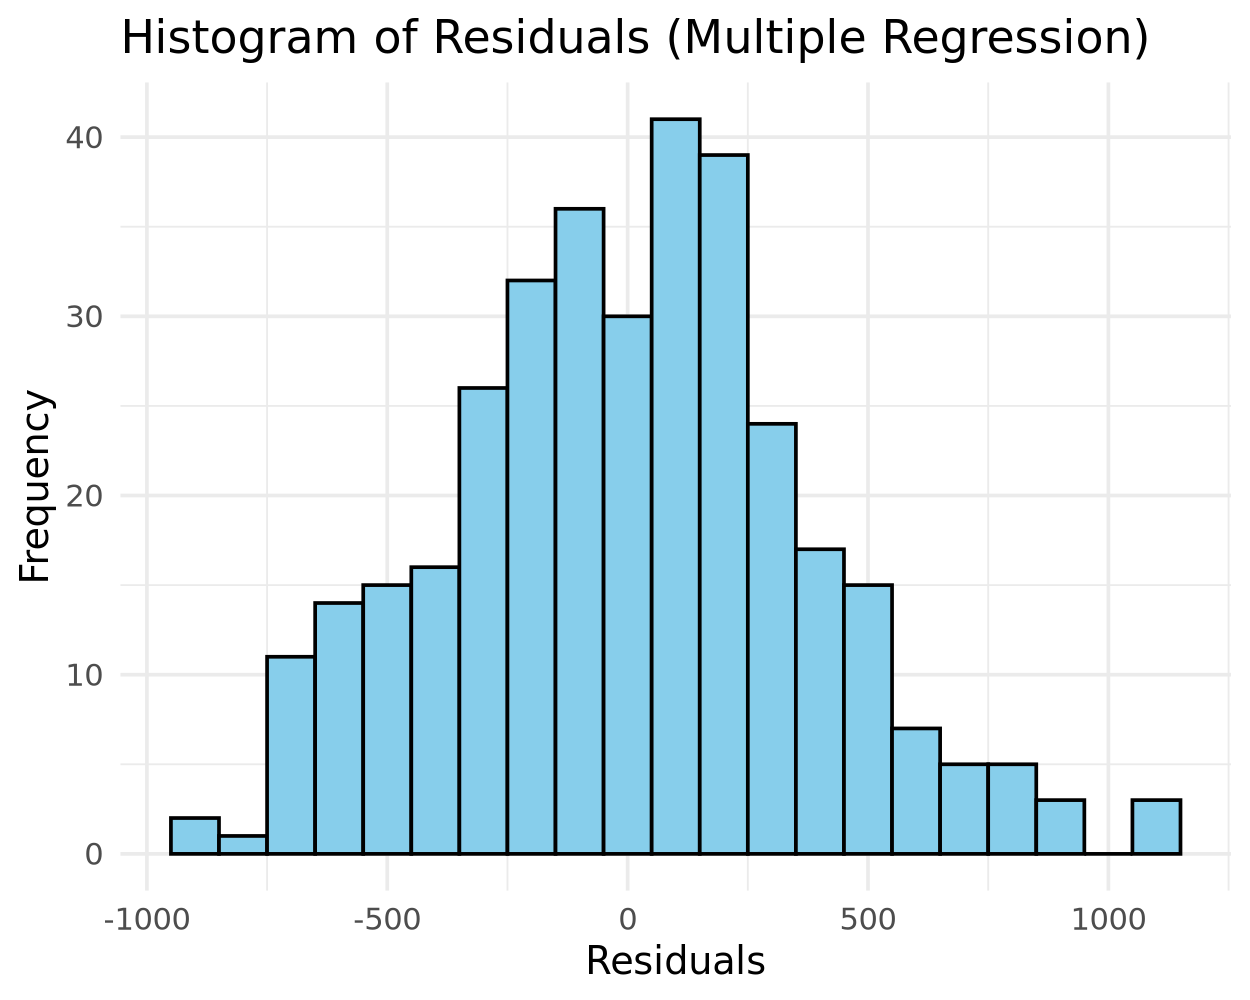

In [15]:
regression_points_parallel <- augment(pen_parallel, new_data = pen)

ggplot(regression_points_parallel, aes(x = .resid)) +
  geom_histogram(binwidth = 100, fill = "skyblue", color = "black") +
  labs(title = "Histogram of Residuals (Multiple Regression)", x = "Residuals", y = "Frequency") +
  theme_minimal()



**8b)** Does this model meet the Normality of Residuals condition?

**Answer:**

Yes, the residuals appear approximately normally distributed. The histogram shows a roughly bell-shaped, symmetric distribution centered near zero with only slight deviations at the tails. This indicates that the normality assumption is reasonably satisfied for this model.



## Question 9

Check for Equality of variance of the residuals

To check this condition we can create a scatterplot that has our
explanatory variable, `flipper_length_mm`, on the x-axis and our
residuals on the y-axis.

**9a)**

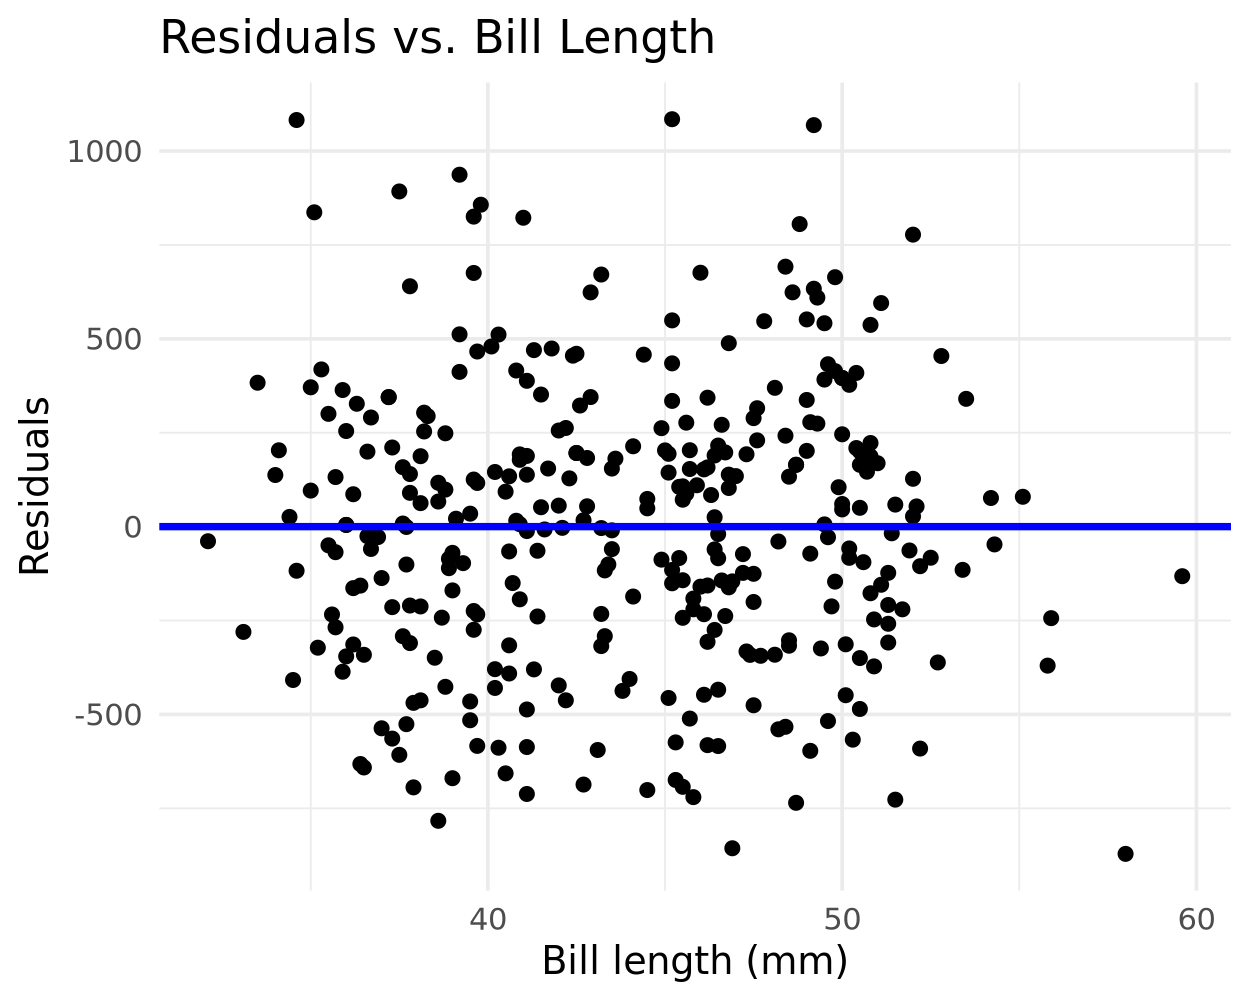

In [16]:
ggplot(regression_points_parallel, aes(x = bill_length_mm, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, color = "blue", linewidth = 1) +
  labs(title = "Residuals vs. Bill Length", x = "Bill length (mm)", y = "Residuals") + 
  theme_minimal()


**9b) **Does this meet the equality of variance of the residuals
condition?

**Answer:**

Yes, the residuals appear to have a roughly constant spread across all values of bill length. The scatterplot shows points evenly dispersed around zero without a clear pattern or funnel shape, suggesting that the assumption of equal variance (homoscedasticity) is reasonably satisfied for this model.



## Question 10

Run the code below to find the confidence intervals for our model's coefficients.

In [17]:
boots = bootstraps(pen, times = 1000, apparent = TRUE)

mod = linear_reg() |> set_engine('lm')

boot_models  = boots |> 
  mutate(model = map(splits, ~mod |> fit(body_mass_g ~ bill_length_mm + species, data = as_tibble(.x))),
         coef_info = map(model, tidy))

boot_coefs = boot_models |> 
  unnest(coef_info)

percentile_intervals = int_pctl(boot_models, coef_info)

percentile_intervals

term,.lower,.estimate,.upper,.alpha,.method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-363.55505,147.08379,611.4586,0.05,percentile
bill_length_mm,79.83436,91.60724,104.7303,0.05,percentile
speciesChinstrap,-1045.60690,-888.89185,-742.3112,0.05,percentile
speciesGentoo,432.48249,575.28073,715.0427,0.05,percentile


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


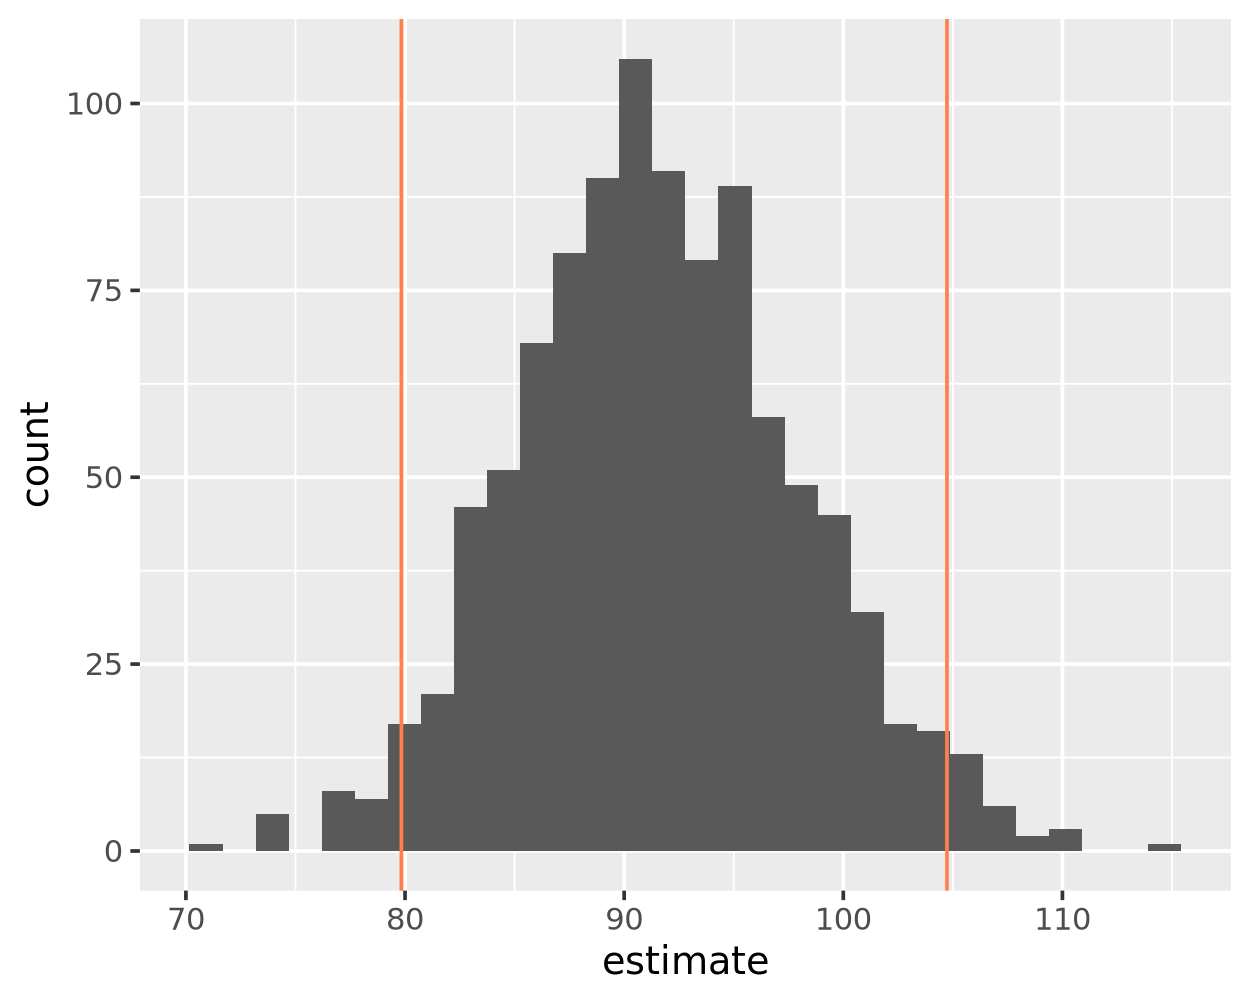

In [18]:
boot_coefs |> filter(term == 'bill_length_mm') |>
ggplot(aes(x = estimate)) +
    geom_histogram() +
    geom_vline(xintercept = percentile_intervals |> filter(term == 'bill_length_mm') |> pull(.lower), color = 'coral') +
    geom_vline(xintercept = percentile_intervals |> filter(term == 'bill_length_mm') |> pull(.upper), color = 'coral')

What can we conclude about the relationship between bill length and body
mass?

**Answer:**

The bootstrap distribution of slopes for bill_length_mm is roughly bell-shaped and centered near 91.6, with a 95% confidence interval spanning approximately 79.8 to 104.7 grams. Since the entire interval lies above zero, this indicates a clear positive relationship between bill length and body mass. In practical terms, penguins with longer bills generally weigh more, and this consistent result across bootstrap samples suggests a stable and reliable association.
